# The Central Limit Theorem
<hr>

Let $\{X_1, X_2, ..., X_n\}$ be random variables sampled independently from the same distribution with mean $\mu$ and variance $\sigma^2$. Let $\bar{X_n}$ be the average of $X_1, X_2, ..., X_n$ then for any fixed number x we have 

$$\lim_{n \rightarrow \infty}P(\frac{\bar{X_n}-\mu}{\sigma / \sqrt{n}} \le x) = \lim_{n \rightarrow \infty}P(\frac{\sqrt{n}}{\sigma}(\bar{X_n} - \mu) \le x) = \Phi(x)$$

where $\Phi(x)$ is the standard normal cumulative density function.

## In other words

For almost any distribution if we sample from it sufficiently many times, then the average of the variables $\bar{X_n}$ approximates a normal distribution with mean $\mu$ and variance $\sigma^2/n$. So when we standardize the distribution of $\bar{X_n}$ the new distribution approximates the standard normal distribution.

This means if we take a large enough sample from any distribution the mean will be normally distributed. 

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from warnings import filterwarnings

In [61]:
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
mpl.rcParams['figure.figsize'] = (10, 6)
filterwarnings('ignore')
sns.set()

## Example

We can create any distribution we want and show the CLT holds.

In [62]:
# We create a random distribution 
dist1 = np.random.randint(1, 11, 500)
dist2 = np.random.randint(8, 11, 500)
dist = np.concatenate((dist1, dist2))

distribution = {n: (dist == n).sum() / len(dist) for n in range(1, 11)}
print(distribution)
# NOTE: For every value in our distribution, 
# the sum of all the probabilities should equal 1.
sum(distribution.values())

{1: 0.045, 2: 0.048, 3: 0.048, 4: 0.045, 5: 0.047, 6: 0.063, 7: 0.058, 8: 0.214, 9: 0.224, 10: 0.208}


0.9999999999999999

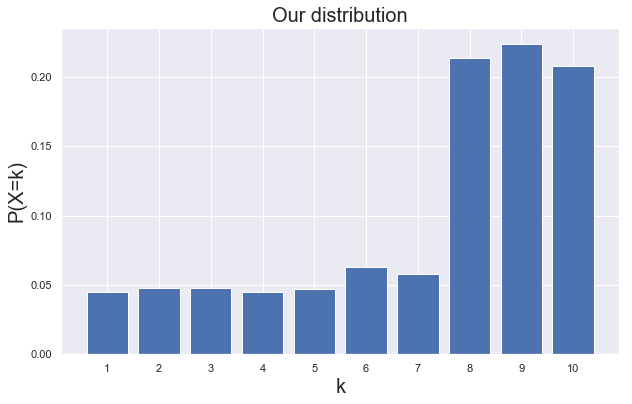

In [63]:
plt.bar(distribution.keys(), distribution.values())
plt.title('Our distribution', fontsize=20)
plt.xticks(range(1,11))
plt.xlabel('k', fontsize=20)
plt.ylabel('P(X=k)', fontsize=20);

We know that the mean (or expectation) of any probability distribution (X) is $\mu = E(X) = \sum_k k * P(X=k)$
and the variance is just $V(X) = E(X^2) - [E(X)]^2 = \sum_k k^2 * P(X=k) - [E(X)]^2$

In [64]:
dist_vals = np.array(list(distribution.keys()))
dist_probs = np.array(list(distribution.values()))

dist_mean = (dist_vals * dist_probs).sum()
dist_variance = np.sum((dist_vals**2) * dist_probs) - dist_mean**2
dist_std = np.sqrt(dist_variance)

print(f'The mean of our distribution is {dist_mean:.3f}')
print(f'and the standard deviation is {dist_std:.3f}')

The mean of our distribution is 7.292
and the standard deviation is 2.672


<hr style="height: 1px">
Now if take a sample from this distribution and find it's average it should be normally distributed. Furthermore, the bigger our sample size (n) the more normal the distribution of the sample means will look.

So here's the process:
1. Sample n points from the distribution.
2. Calculate the mean.
3. Repeat 10,000 times.
4. Plot the distribution of the means (spoiler it should look normal).

We'll start with a sample size of $n=4$ plot the distribution of means and repeat with increasing sample sizes. We should see the histograms start to look more and more normally distributed as we icrease n.

In [65]:
n = 4
means = []
for _ in range(10_000):
    # Take a sample of size 4 according to the probabilities.
    sample = np.random.choice(dist_vals, p=dist_probs, size=n)
    means.append(sample.mean())
means = np.array(means)

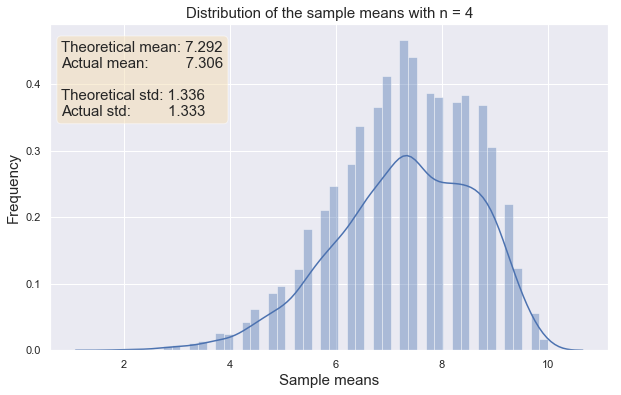

In [66]:
text = f'''Theoretical mean: {dist_mean:.3f}
Actual mean:         {means.mean():.3f}

Theoretical std: {dist_std / np.sqrt(n):.3f}
Actual std:         {means.std():.3f}'''

plt.text(0.02, 0.95, text, transform=plt.gca().transAxes, fontsize=15,
    verticalalignment='top', bbox=props)

plt.xlabel('Sample means', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
sns.distplot(means)
plt.title(f'Distribution of the sample means with n = {n}', fontsize=15)
plt.show()

The histogram looks kind of normal. Let's check that the mean is approximately the same as the mean of the original distribution and the standard deviation is approximately $\sigma / \sqrt n$.

In [67]:
print(f'Theoretical mean: {dist_mean:.3f}')
print(f'Actual mean:      {means.mean():.3f}')
print()
print(f'Theoretical standard deviation: {dist_std / np.sqrt(4):.3f}')
print(f'Actual standard deviation:      {means.std():.3f}')

Theoretical mean: 7.292
Actual mean:      7.306

Theoretical standard deviation: 1.336
Actual standard deviation:      1.333


If we increase our sample size and repeat the process we should get more accurate results. Let's try with a sample size $n = 10$.

In [68]:
n = 10
means = []
for _ in range(10_000):
    # Take a sample of size 10 according to the probabilities.
    sample = np.random.choice(dist_vals, p=dist_probs, size=n)
    means.append(sample.mean())
means = np.array(means)

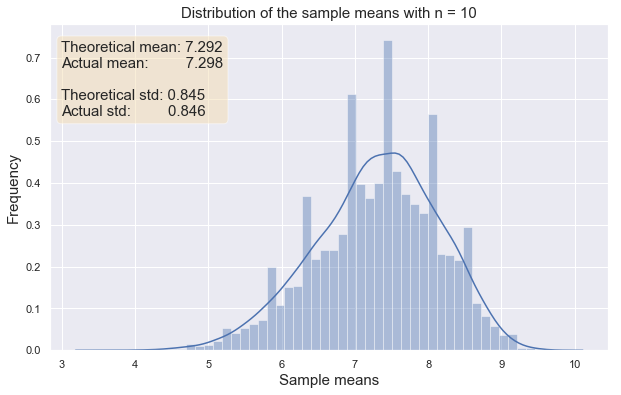

In [69]:
text = f'''Theoretical mean: {dist_mean:.3f}
Actual mean:         {means.mean():.3f}

Theoretical std: {dist_std / np.sqrt(n):.3f}
Actual std:         {means.std():.3f}'''

plt.text(0.02, 0.95, text, transform=plt.gca().transAxes, fontsize=15,
    verticalalignment='top', bbox=props)

plt.xlabel('Sample means', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
sns.distplot(means)
plt.title(f'Distribution of the sample means with n = {n}', fontsize=15)
plt.show()

The results look much better! We'll do it one more time with a sample size of $n = 20$. Then we'll redo the process with an even weirder distribution.

In [70]:
n = 20
means = []
for _ in range(10_000):
    # Take a sample of size 10 according to the probabilities.
    sample = np.random.choice(dist_vals, p=dist_probs, size=n)
    means.append(sample.mean())
means = np.array(means)

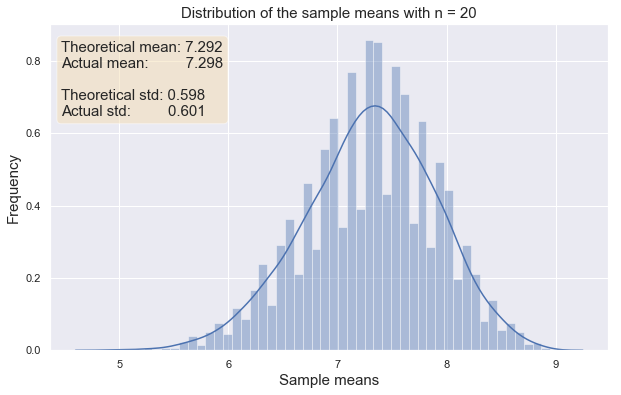

In [71]:
text = f'''Theoretical mean: {dist_mean:.3f}
Actual mean:         {means.mean():.3f}

Theoretical std: {dist_std / np.sqrt(n):.3f}
Actual std:         {means.std():.3f}'''

plt.text(0.02, 0.95, text, transform=plt.gca().transAxes, fontsize=15,
    verticalalignment='top', bbox=props)

plt.xlabel('Sample means', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
sns.distplot(means)
plt.title(f'Distribution of the sample means with n = {n}', fontsize=15)
plt.show()

Let's refactor everything we've done into a function that accepts a distribution and sample size and gives us the distribution of sample means.

In [72]:
def clt(dist, n):
    '''
    Parameters: 
        dist - A dictionary where the keys are the values of the distribution
               and the values are their corresponding probabilities.
        
        n - The sample size to use.
    ==========================================================================
    The function takes in the distribution and sample size and plots the distribution of the
    sample means as shown above in order to display the central limit theorem.
    '''
    dist_vals = np.array(list(dist.keys()))
    dist_probs = np.array(list(dist.values()))

    dist_mean = (dist_vals * dist_probs).sum()
    dist_std = np.sqrt(np.sum((dist_vals**2) * dist_probs) - dist_mean**2)

    means = []
    for _ in range(10_000):
        # Take a sample of size 4 according to the probabilities.
        sample = np.random.choice(dist_vals, p=dist_probs, size=n)
        means.append(sample.mean())
    means = np.array(means)
    
    text = f'''Theoretical mean: {dist_mean:.3f}
Actual mean:         {means.mean():.3f}

Theoretical std: {dist_std / np.sqrt(n):.3f}
Actual std:         {means.std():.3f}'''

    plt.text(0.02, 0.95, text, transform=plt.gca().transAxes, fontsize=15,
        verticalalignment='top', bbox=props)

    plt.xlabel('Sample means', fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    sns.distplot(means)
    plt.title(f'Distribution of the sample means with n = {n}', fontsize=15)
    plt.show()

In [74]:
distribution

{1: 0.045,
 2: 0.048,
 3: 0.048,
 4: 0.045,
 5: 0.047,
 6: 0.063,
 7: 0.058,
 8: 0.214,
 9: 0.224,
 10: 0.208}

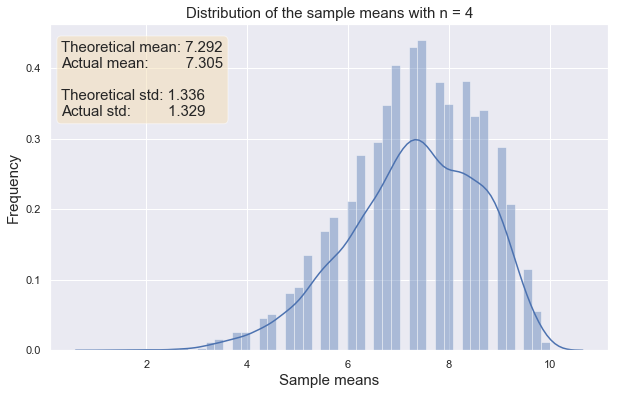

In [79]:
clt(distribution, 4)

Now we'll define a different distribution and test the central limit theorem.

In [91]:
dist1 = np.random.randint(0,11, 500)
dist2 = np.random.randint(4,8, 500)
dist3 = np.random.randint(15, 21, 500)
dist4 = np.random.randint(17, 19, 500)
dist = np.concatenate((dist1, dist2, dist3, dist4))


In [92]:
np.unique(dist, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 15, 16, 17, 18, 19, 20]),
 array([ 43,  48,  45,  40, 167, 166, 180, 167,  50,  46,  48,  89,  87,
        317, 331,  97,  79]))

32